# 학습 목표
1. QSAR/QSPR의 원리에 대해 학습한다.
2. QSAR의 Ensemble 모델을 구현한다.

# 1. QSAR/QSPR 모델이란?
- QSAR(Quantitative Structure-Activity Relationship)과 QSPR(Quantitative Structure-Property Relationship)은 화학 구조와 생물학적 활성 또는 물리화학적
특성 간의 수학적 관계를 정량적으로 분석하는 계산 모델
- 화합물의 구조적 특성을 수치화하여 그 특성이나 활성을 예측하는 데 사용
    - QSAR: 화학 구조와 생물학적 활성(약리학적 효과, 독성 등) 간의 관계를 모델링
    - QSPR: 화학 구조와 물리화학적 특성(용해도, 끓는점, 분배계수 등) 간의 관계를 모델링
- QSAR/QSPR 모델링의 기본 가정은 "유사한 분자는 유사한 특성을 가진다"는 것
- 화합물의 구조적 특성을 설명자(descriptor)로 변환하고, 이를 통계적 또는 기계학습 방법으로 분석하여 특성이나 활성을 예측하는 모델을 구축

<img src='https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41573-023-00832-0/MediaObjects/41573_2023_832_Fig1_HTML.png'>

# 2. QSAR/QSPR 모델링 과정

1. 데이터 수집
    - 신뢰할 수 있는 실험 데이터를 수집
    - 일관된 실험 조건에서 얻어진 것이어야 하며, 충분한 구조적 다양성을 포함해야 함
2. 분자 설명자(Molecular Descriptor) 계산
    - 구조적 설명자: 원자 수, 결합 수, 고리 수 등
    - 물리화학적 설명자: logP, 분자량, 극성 표면적, 수소 결합 수용체/공여체 수 등
    - 양자화학적 설명자: HOMO/LUMO 에너지, 전하 분포, 쌍극자 모멘트 등
    - 토폴로지 설명자: 연결성 지수, 형태 지수 등
    - 지문(Fingerprint): ECFP, MACCS 키 등
3. 변수 선택 및 모델 구축
    - 통계적 방법: 다중 선형 회귀(MLR), 주성분 분석(PCA), 부분 최소 제곱법(PLS)
    - 기계학습 방법: 랜덤 포레스트, 서포트 벡터 머신(SVM), 인공 신경망(ANN), 딥러닝
4. 모델 검증
    - 내부 검증: 교차 검증(cross-validation), 부트스트래핑(bootstrapping)
    - 외부 검증: 독립적인 테스트 세트를 사용한 검증
    - Y-스크램블링: 무작위화된 응답 변수로 모델을 구축하여 우연한 상관관계 확인

<img src='https://www.researchgate.net/publication/28358424/figure/fig2/AS:341372746911745@1458401013121/Schematic-overview-of-the-QSAR-process.png'>

# 3. QSAR/QSPR 모델링의 도구 및 소프트웨어

- 오픈 소스
    - RDKit: 화학정보학 및 기계학습 도구
    - KNIME: 워크플로우 기반 데이터 분석 플랫폼
    - OCHEM: 웹 기반 QSAR/QSPR 모델링 플랫폼
    - PaDEL-Descriptor: 분자 설명자 계산 소프트웨어
- 상용 프로그램
    - MOE (Molecular Operating Environment): 분자 모델링 및 QSAR
    - Schrödinger Suite: 약물 설계 및 분자 모델링
    - Dragon: 분자 설명자 계산
    - ADMET Predictor: ADME 및 독성 예측


# 4. 딥러닝 기반의 QSAR 구현 실습

DLCA(Deep Learning Consensus Architecture) 모델

Zakharov, A. V., Zhao, T., Nguyen, D. T., Peryea, T., Sheils, T., Yasgar, A., ... & Simeonov, A. (2019). Novel consensus architecture to improve performance of large-scale multitask deep learning QSAR models. Journal of chemical information and modeling, 59(11), 4613-4624.

https://pubs.acs.org/doi/10.1021/acs.jcim.9b00526

<img src='https://pubs.acs.org/cms/10.1021/acs.jcim.9b00526/asset/images/medium/ci9b00526_0007.gif'>

개별 모델:
- Morgan 지문 모델: 원자 환경을 기반으로 한 순환 지문을 사용
- Avalon 지문 모델: 구조 키 기반 지문을 사용
- Atom Pair 지문 모델: 원자 쌍 간의 관계를 인코딩한 지문을 사용

앙상블 모델:
- Combined 모델: 세 가지 지문을 단순히 연결하여 입력으로 사용
- DLCA 모델: 세 가지 개별 모델의 예측을 최적의 가중치로 결합

In [ ]:
!pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.7 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 4.1. 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score, mean_squared_error
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Avalon import pyAvalonTools
from tdc.single_pred import Tox
import matplotlib.pyplot as plt

# TDC 데이터 로드
data = Tox(name='hERG')
split = data.get_split()

Found local copy...
Loading...
Done!


## 4.2. 분자 특성 추출 함수 정의

In [ ]:
def get_morgan_fingerprint(smiles, radius=2, nBits=1024):
    """Morgan 지문 계산"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))

def get_avalon_fingerprint(smiles, nBits=1024):
    """Avalon 지문 계산 - 수정된 함수"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)
    return np.array(pyAvalonTools.GetAvalonFP(mol, nBits=nBits))

def get_atom_pair_fingerprint(smiles, nBits=1024):
    """Atom Pair 지문 계산 - 수정된 함수"""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)
    pairs = Pairs.GetAtomPairFingerprint(mol)
    arr = np.zeros(nBits)
    for pair, count in pairs.GetNonzeroElements().items():
        idx = pair % nBits
        arr[idx] += count
    return arr

def extract_features(df):
    """모든 분자 지문 추출"""
    morgan_fps = np.array([get_morgan_fingerprint(s) for s in df['Drug']])
    avalon_fps = np.array([get_avalon_fingerprint(s) for s in df['Drug']])
    atom_pair_fps = np.array([get_atom_pair_fingerprint(s) for s in df['Drug']])

    return {
        'morgan': morgan_fps,
        'avalon': avalon_fps,
        'atom_pair': atom_pair_fps
    }

## 4.3. 데이터셋 및 모델 정의

In [ ]:
class MoleculeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels).reshape(-1, 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
class ToxicityPredictor(nn.Module):
    def __init__(self, input_dim):
        super(ToxicityPredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

class DLCAModel(nn.Module):
    def __init__(self, num_models):
        super(DLCAModel, self).__init__()
        self.weights = nn.Parameter(torch.ones(num_models) / num_models)

    def forward(self, predictions):
        # predictions: 각 모델의 예측값 리스트
        weighted_sum = torch.zeros_like(predictions[0])
        for i, pred in enumerate(predictions):
            weighted_sum += self.weights[i] * pred
        return weighted_sum

## 4.4. 모델 학습 및 평가 함수 정의

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=50):
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')
    best_model = None

    for epoch in range(epochs):
        # 학습
        model.train()
        train_loss = 0
        for features, labels in train_loader:
            features, labels = features.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # 검증
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for features, labels in val_loader:
                features, labels = features.to(device), labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = model.state_dict().copy()

        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    model.load_state_dict(best_model)
    return model, train_losses, val_losses

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for features, labels in test_loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)

            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds).flatten()
    all_labels = np.array(all_labels).flatten()

    auc = roc_auc_score(all_labels, all_preds)
    rmse = np.sqrt(mean_squared_error(all_labels, all_preds))

    return auc, rmse, all_preds

## 4.5. 모델 학습 및 비교

Using device: cuda
데이터 크기 - 학습: 458, 검증: 66, 테스트: 131
특성 추출 중...


[17:58:42] WARNING: not removing hydrogen atom without neighbors
[17:58:42] WARNING: not removing hydrogen atom without neighbors
[17:58:42] WARNING: not removing hydrogen atom without neighbors
[17:58:42] WARNING: not removing hydrogen atom without neighbors
[17:58:43] WARNING: not removing hydrogen atom without neighbors
[17:58:43] WARNING: not removing hydrogen atom without neighbors


특성 추출 완료

== Training model with morgan fingerprints ==
Epoch 0, Train Loss: 0.6308, Val Loss: 0.8919
Epoch 10, Train Loss: 0.0484, Val Loss: 2.8089
Epoch 20, Train Loss: 0.0133, Val Loss: 2.7512
morgan Test AUC: 0.7927, RMSE: 0.4405

== Training model with avalon fingerprints ==
Epoch 0, Train Loss: 0.6695, Val Loss: 0.7562
Epoch 10, Train Loss: 0.1317, Val Loss: 0.6917
Epoch 20, Train Loss: 0.0751, Val Loss: 0.9282
avalon Test AUC: 0.7661, RMSE: 0.4598

== Training model with atom_pair fingerprints ==
Epoch 0, Train Loss: 0.5641, Val Loss: 0.9584
Epoch 10, Train Loss: 0.2731, Val Loss: 0.9669
Epoch 20, Train Loss: 0.2289, Val Loss: 0.9935
atom_pair Test AUC: 0.7166, RMSE: 0.4264

== Training DLCA ensemble model ==
Epoch 0, Train Loss: 0.5823, Val Loss: 0.9711
Epoch 10, Train Loss: 0.1040, Val Loss: 0.4539
Epoch 20, Train Loss: 0.0329, Val Loss: 2.2472
Combined Model Test AUC: 0.8078, RMSE: 0.3901
DLCA Epoch 0, Loss: 0.6985
DLCA Epoch 20, Loss: 0.5037
DLCA Epoch 40, Loss: 0.5081
DLCA 

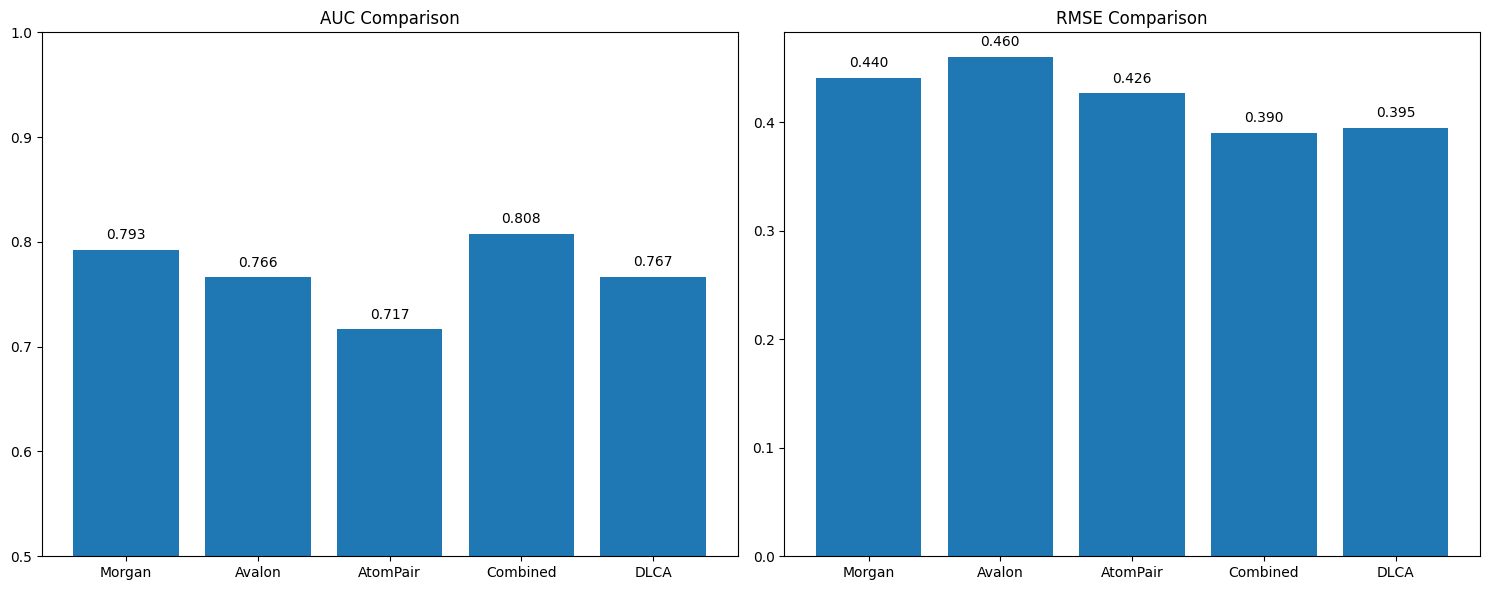

In [ ]:
# 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 데이터 준비
train_df = split['train']
valid_df = split['valid']
test_df = split['test']

print(f"데이터 크기 - 학습: {len(train_df)}, 검증: {len(valid_df)}, 테스트: {len(test_df)}")

# 특성 추출
print("특성 추출 중...")
train_features = extract_features(train_df)
valid_features = extract_features(valid_df)
test_features = extract_features(test_df)
print("특성 추출 완료")

# 하이퍼파라미터
batch_size = 64
learning_rate = 0.001
epochs = 30

# 각 특성 유형에 대한 모델 학습 및 평가
fingerprint_types = ['morgan', 'avalon', 'atom_pair']
models = {}
test_predictions = {}

for fp_type in fingerprint_types:
    print(f"\n== Training model with {fp_type} fingerprints ==")

    # 데이터셋 및 데이터로더 생성
    train_dataset = MoleculeDataset(train_features[fp_type], train_df['Y'].values)
    valid_dataset = MoleculeDataset(valid_features[fp_type], valid_df['Y'].values)
    test_dataset = MoleculeDataset(test_features[fp_type], test_df['Y'].values)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    # 모델, 손실 함수, 옵티마이저 정의
    input_dim = train_features[fp_type].shape[1]
    model = ToxicityPredictor(input_dim).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 모델 학습
    model, _, _ = train_model(
        model, train_loader, valid_loader, criterion, optimizer, device, epochs)

    # 모델 평가
    auc, rmse, predictions = evaluate_model(model, test_loader, device)
    print(f"{fp_type} Test AUC: {auc:.4f}, RMSE: {rmse:.4f}")

    # 모델 및 예측 저장
    models[fp_type] = model
    test_predictions[fp_type] = predictions

# 앙상블 모델 (DLCA)
print("\n== Training DLCA ensemble model ==")

# 모든 특성 결합
combined_train = np.hstack([train_features[fp] for fp in fingerprint_types])
combined_valid = np.hstack([valid_features[fp] for fp in fingerprint_types])
combined_test = np.hstack([test_features[fp] for fp in fingerprint_types])

# 데이터셋 및 데이터로더 생성
combined_train_dataset = MoleculeDataset(combined_train, train_df['Y'].values)
combined_valid_dataset = MoleculeDataset(combined_valid, valid_df['Y'].values)
combined_test_dataset = MoleculeDataset(combined_test, test_df['Y'].values)

combined_train_loader = DataLoader(combined_train_dataset, batch_size=batch_size, shuffle=True)
combined_valid_loader = DataLoader(combined_valid_dataset, batch_size=batch_size)
combined_test_loader = DataLoader(combined_test_dataset, batch_size=batch_size)

# 모델, 손실 함수, 옵티마이저 정의
combined_model = ToxicityPredictor(combined_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(combined_model.parameters(), lr=learning_rate)

# 모델 학습
combined_model, _, _ = train_model(
    combined_model, combined_train_loader, combined_valid_loader, criterion, optimizer, device, epochs)

# 모델 평가
combined_auc, combined_rmse, combined_predictions = evaluate_model(combined_model, combined_test_loader, device)
print(f"Combined Model Test AUC: {combined_auc:.4f}, RMSE: {combined_rmse:.4f}")

# 개별 모델의 검증 세트 예측
val_predictions = []
for fp_type in fingerprint_types:
    model = models[fp_type]
    model.eval()
    preds = []

    with torch.no_grad():
        valid_loader = DataLoader(MoleculeDataset(valid_features[fp_type], valid_df['Y'].values), batch_size=batch_size)
        for features, _ in valid_loader:
            features = features.to(device)
            outputs = model(features)
            preds.extend(outputs.cpu().numpy())

    val_predictions.append(torch.tensor(preds).reshape(-1, 1))

# DLCA 모델 학습
dlca_model = DLCAModel(len(fingerprint_types)).to(device)
dlca_criterion = nn.BCELoss()
dlca_optimizer = optim.Adam(dlca_model.parameters(), lr=0.01)

valid_labels = torch.FloatTensor(valid_df['Y'].values).reshape(-1, 1).to(device)
val_predictions = [p.to(device) for p in val_predictions]

# DLCA 가중치 학습
dlca_model.train()
for epoch in range(100):
    dlca_optimizer.zero_grad()
    ensemble_pred = dlca_model(val_predictions)
    loss = dlca_criterion(ensemble_pred, valid_labels)
    loss.backward()
    dlca_optimizer.step()

    if epoch % 20 == 0:
        print(f'DLCA Epoch {epoch}, Loss: {loss.item():.4f}')

# 최종 가중치 출력
print("DLCA Model Weights:", dlca_model.weights.detach().cpu().numpy())

# 테스트 세트에서 DLCA 모델 평가
test_predictions_list = []
for fp_type in fingerprint_types:
    model = models[fp_type]
    model.eval()
    preds = []

    with torch.no_grad():
        test_loader = DataLoader(MoleculeDataset(test_features[fp_type], test_df['Y'].values), batch_size=batch_size)
        for features, _ in test_loader:
            features = features.to(device)
            outputs = model(features)
            preds.extend(outputs.cpu().numpy())

    test_predictions_list.append(torch.tensor(preds).reshape(-1, 1))

# DLCA 예측
dlca_model.eval()
test_predictions_list = [p.to(device) for p in test_predictions_list]
with torch.no_grad():
    dlca_preds = dlca_model(test_predictions_list).cpu().numpy().flatten()

# DLCA 성능 평가
dlca_auc = roc_auc_score(test_df['Y'].values, dlca_preds)
dlca_rmse = np.sqrt(mean_squared_error(test_df['Y'].values, dlca_preds))
print(f"DLCA Ensemble Test AUC: {dlca_auc:.4f}, RMSE: {dlca_rmse:.4f}")

# 결과 비교
results = {
    'Morgan': {'AUC': roc_auc_score(test_df['Y'].values, test_predictions['morgan']),
                'RMSE': np.sqrt(mean_squared_error(test_df['Y'].values, test_predictions['morgan']))},
    'Avalon': {'AUC': roc_auc_score(test_df['Y'].values, test_predictions['avalon']),
                'RMSE': np.sqrt(mean_squared_error(test_df['Y'].values, test_predictions['avalon']))},
    'AtomPair': {'AUC': roc_auc_score(test_df['Y'].values, test_predictions['atom_pair']),
                'RMSE': np.sqrt(mean_squared_error(test_df['Y'].values, test_predictions['atom_pair']))},
    'Combined': {'AUC': combined_auc, 'RMSE': combined_rmse},
    'DLCA': {'AUC': dlca_auc, 'RMSE': dlca_rmse}
}

# 결과 시각화
models_list = list(results.keys())
auc_values = [results[model]['AUC'] for model in models_list]
rmse_values = [results[model]['RMSE'] for model in models_list]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(models_list, auc_values)
ax1.set_title('AUC Comparison')
ax1.set_ylim(0.5, 1.0)
for i, v in enumerate(auc_values):
    ax1.text(i, v + 0.01, f"{v:.3f}", ha='center')

ax2.bar(models_list, rmse_values)
ax2.set_title('RMSE Comparison')
for i, v in enumerate(rmse_values):
    ax2.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()